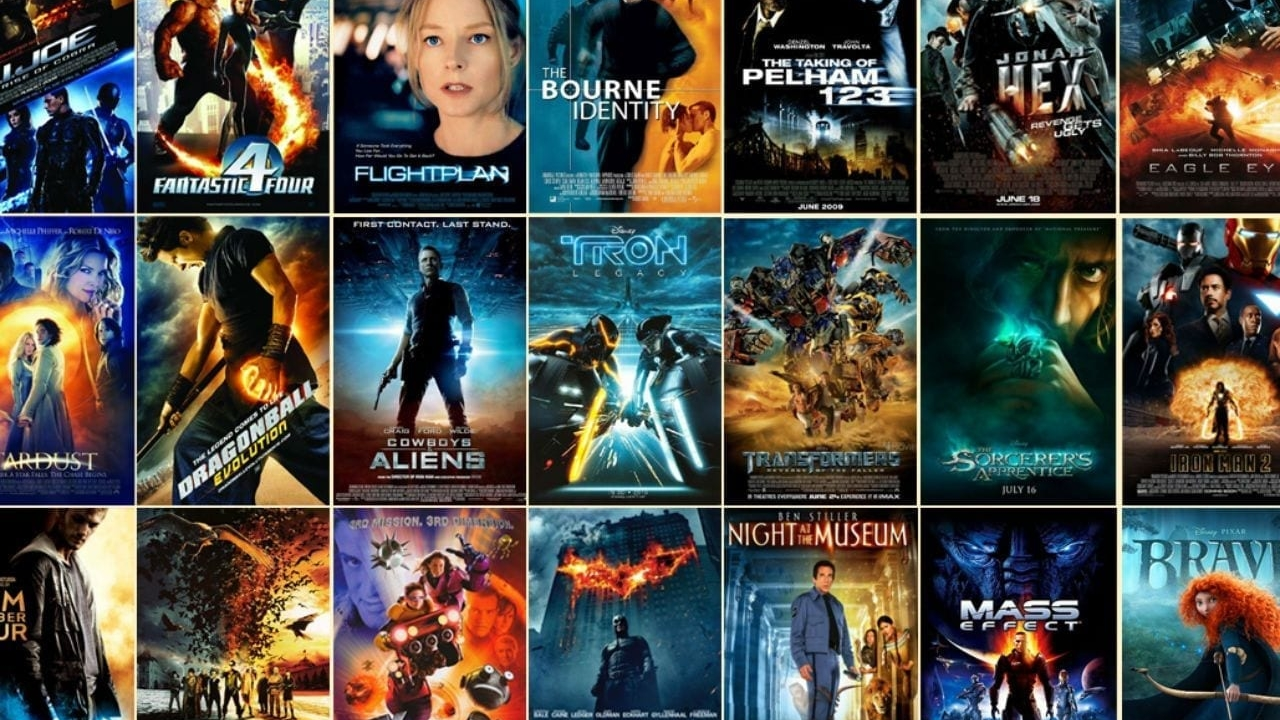

# Project Overview
##### For this project, I will use exploratory data analysis to generate insights for a business stakeholder.

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun.
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office. 
You must then translate those findings into actionable insights that the head of Microsoft's new 
movie studio can use to help decide what type of films to create.

In [37]:
#Load Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nbconvert
%matplotlib inline

In [2]:
#Load the imdb.title.basics.csv dataset
basics = pd.read_csv(r"C:\Users\Obegi Oyori\Desktop\Moringa\title_basics.csv")
basics.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#Load the imdb.title.ratings.csv dataset
ratings = pd.read_csv(r"C:\Users\Obegi Oyori\Desktop\Moringa\title_ratings.csv")
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
#Load the bom.movie_gross.csv dataset
movie_gross = pd.read_csv(r"C:\Users\Obegi Oyori\Desktop\Moringa\bom_movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#Data Cleaning

In [6]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Reseach Questions
####  1. Is there a relationship between run-time in minutes and average movie rating?
#### 2. Which movie genres are the most popular?
#### 3. Which movies are currently doing well locally and internationally?

In [9]:
#Merge the basics and the ratings dataframes. 
basics_rating = pd.merge(basics, ratings, on='tconst', how='outer') 

basics_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [10]:
print(basics_rating.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB
None


In [11]:
print((basics_rating.isna().sum()/146144)*100) #Check the percentage of missing values in each variables in the dataframe. 

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
averagerating      49.463543
numvotes           49.463543
dtype: float64


The variables, averagerating and numvotes have the highest percentage of missing values. A half of the data for those two variables are missing. Dropping these columns is not an option since one of our objectives will not be attained without them. 

#

### 1. Relationship between run-time in minutes and average movie rating
Here, we want to establish the relationship between run-time in minutes and average movie rating. This will help us understand how the rating of a movie vaies with the length(in minutes) of a movie. The outcome will help advise microsoft whether to concentrate more on short duration movies or long duration movies.  

In [12]:
#Create a new dataframe with avareagerating and runtime data 
run_average = basics_rating[["runtime_minutes","averagerating"]]
run_average.head()

,runtime_minutes,averagerating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
3,NaN,6.1
4,80.0,6.5


In [13]:
#Remove rows with missing values
run_average = run_average.dropna(axis=0, how='any') 
run_average.head()

,runtime_minutes,averagerating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
4,80.0,6.5
7,83.0,8.1


In [14]:
run_average.isna().sum() # Check if there is any missing values. 

runtime_minutes    0
averagerating      0
dtype: int64

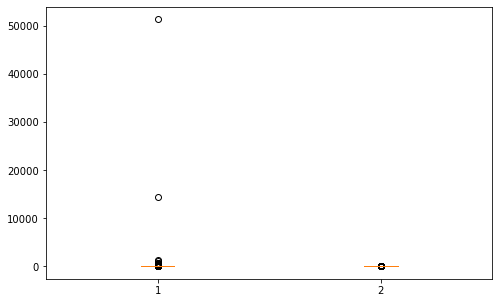

In [15]:
#Clean the new run_average dataframe to conform to the correlation analysis. 
#Check and remove the outliers from the dataset
fig, ax = plt.subplots(figsize =(8, 5)) # Figure Size
plt.boxplot(run_average);

As can be seen from the boxplot diagram, there are two data points which seem to be outliers in the runtime_minutes	variable. These two points can be removed from the data before we proceed. 

In [16]:
#After a visual inspection, anything above 1000 minutes is regarded as an outlier and should be discarded. 
run_average['runtime_minutes'] = run_average.loc[(run_average['runtime_minutes'] < 1000)]

In [17]:
#Conduct the correlation analysis
run_average.corr()

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.032374
averagerating,-0.032374,1.000000


There is no meaningful linear association between the length of a movie and the rating. This means that the movies were given high or low rating regardless of the its length. 

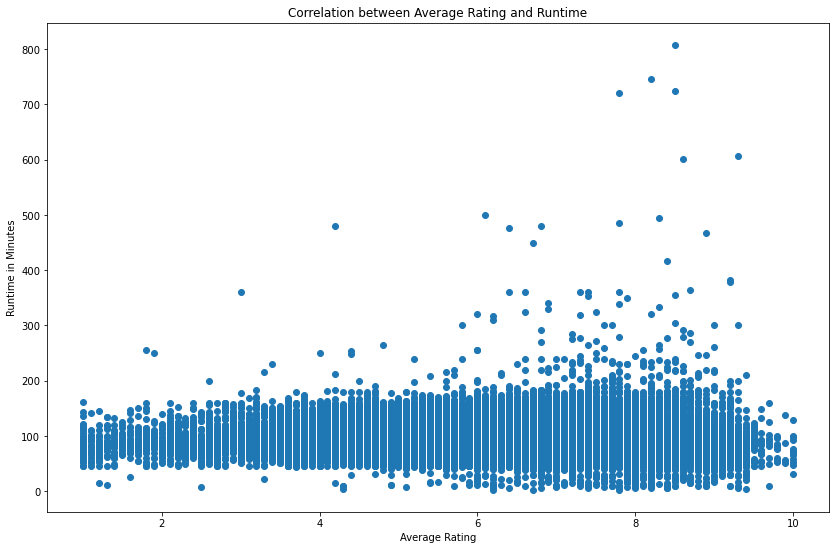

In [18]:
#Visualize the correlation
fig, ax = plt.subplots(figsize =(14, 9)) # Figure Size
x = run_average["averagerating"]
y = run_average["runtime_minutes"]


plt.scatter(x, y)
plt.title('Correlation between Average Rating and Runtime')
plt.xlabel('Average Rating')
plt.ylabel('Runtime in Minutes')
plt.show()

There is no significant relationship between the average rating and runtime

#

### 2. Most popular movie genres

In [19]:
basics_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [20]:
#Create a new dataframe with genres
genres = basics_rating["genres"]
genres.head()

0      Action,Crime,Drama
1         Biography,Drama
2                   Drama
3            Comedy,Drama
4    Comedy,Drama,Fantasy
Name: genres, dtype: object

In [21]:
genres.dropna(inplace= True)

In [22]:
genres.isna().sum()

0

In [23]:
genres.value_counts().head(10)

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [24]:
genres.value_counts().head(10)

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

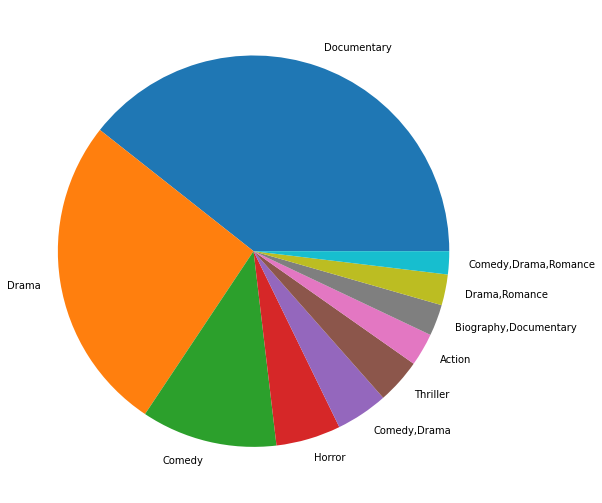

In [25]:
# Create a pie chart
fig, ax = plt.subplots(figsize =(14, 9)) # Figure Size
ylabels = ["Documentary","Drama","Comedy","Horror","Comedy,Drama","Thriller","Action","Biography,Documentary","Drama,Romance","Comedy,Drama,Romance"]
plt.pie(genres.value_counts().head(10), labels = ylabels)

plt.show() 

The most popular genres are Documentary, Drama and Comedy movies. 

#

### 3. Movies that are currently doing well locally and internationally

In [26]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [27]:
# Sort the movies by domestic_gross
movie_gross.sort_values(by= "domestic_gross", ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [28]:
domestic = movie_gross.sort_values(by= "domestic_gross", ascending=False).head(10)

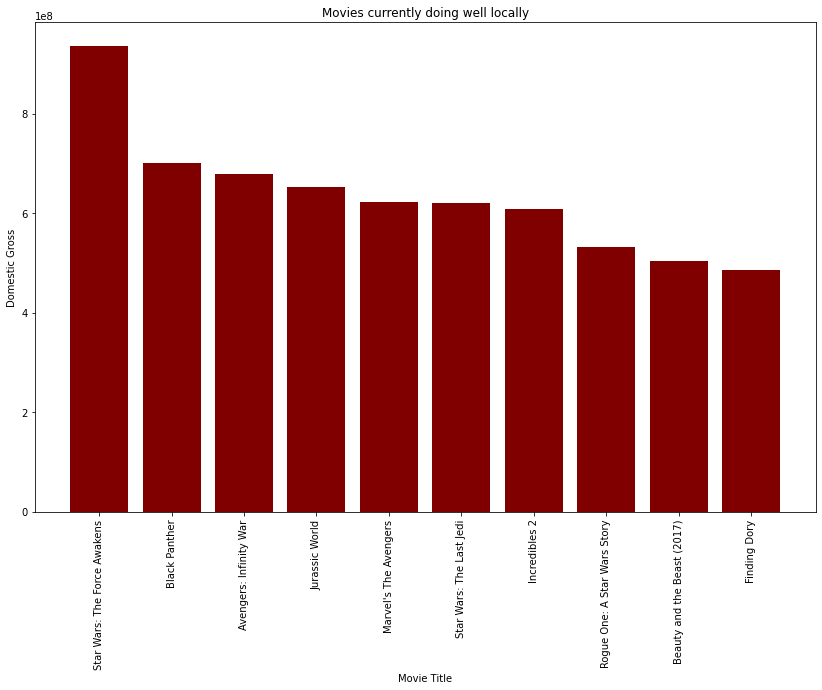

In [29]:
# creating the bar plot

fig, ax = plt.subplots(figsize =(14, 9)) # Figure Size

plt.bar(domestic["title"], domestic["domestic_gross"], color ='maroon')
 
plt.xlabel("Movie Title")
plt.ylabel("Domestic Gross")
plt.title("Movies currently doing well locally")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

We can see that the movie *Star Wars: The Force Awakens* made more money domestically. Surprisingly, the top ten movies that made more money domestically were all (except one) produced by BV studios which was discontinued a few years ago and now run by  Walt Disney Pictures.   

I tried sorting by foreign_gross and noticed it does not make sense. Later, I dicovered that the column foreign gross needs to be cleaned because some vales have comas and others do not and the datatype is object. 

In [30]:
#Remove the commas in some values and covert the datatype to float.
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].str.replace(",","",regex=False).astype(float)

In [31]:
movie_gross["foreign_gross"].head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [32]:
movie_gross.sort_values(by= "foreign_gross", ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


After cleaning, the sorting makes sense now. We can see that *Harry Potter and the Deathly Hallows Part 2* made more money internationally. The movie was produced by Warner Bros. Entertainment Inc. 

In [33]:
foreign = movie_gross.sort_values(by= "foreign_gross", ascending=False).head(10)

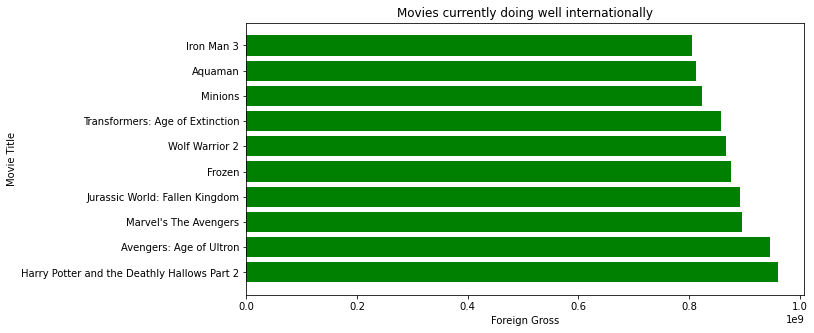

In [36]:
# creating the bar plot

fig, ax = plt.subplots(figsize =(10, 5)) # Figure Size

plt.barh(foreign["title"], foreign["foreign_gross"], color ='green')
 
plt.ylabel("Movie Title")
plt.xlabel("Foreign Gross")
plt.title("Movies currently doing well internationally")
plt.show()

## Recommendations

 1. Should Microsoft produce short movies or long movies? This question was investigated through seeking a relationship between run-time in minutes and average movie rating. There was no meaningful linear relation. Therefore, microsoft is free to produce both single movies and series movies without fear of losing customers.
 
 2. Which Movie genres should Microsoft be concentrating on? The analysis revealed that the most popular genres are documentary, drama and comedy. Microsoft should give priority to the production of these genres. Also, the genres can be combined with other genres for more ineresting outcomes. 
 
 3. Further investigation revealed that **Harry Potter and the Deathly Hallows Part 2** which made more money internationally and **Star Wars: The Force Awakens** which made more money locally were both produced on a budget of over 250 million USD. Microsoft should be ready to put more money by purchasing the best resources and hiring te best actors if it wants to produced best-selling movies. 